In [8]:
from platform import python_version
print(f"Our Python version used on this ML Script is: {python_version()}")

Our Python version used on this ML Script is: 3.12.3


In [9]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregando Dados:

In [10]:
# Carrega o dataset:
dataset = pd.read_csv('datasetskt.csv')

In [11]:
dataset.shape

(500, 2)

In [12]:
dataset.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [14]:
# Resumo estatistico do Data Set
dataset.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


### Analise Exploratória

In [15]:
# Verifica se há valores ausentes
dataset.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [16]:
# Verificando correlação entre as variáveis
dataset.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [17]:
# Resumo estatistico da variavel preditora
dataset['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

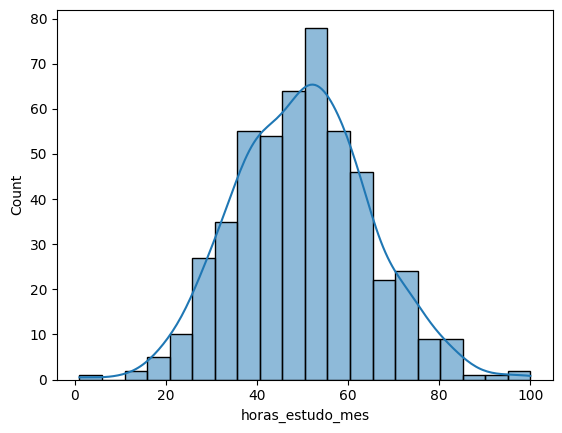

In [21]:
sns.histplot(data = dataset, x = 'horas_estudo_mes', kde = True)

### Preparação dos Dados:

In [22]:
# Prepara a variável de entrada X
X = np.array(dataset['horas_estudo_mes'])

In [23]:
type(X)

numpy.ndarray

In [24]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [25]:
y = dataset['salario']

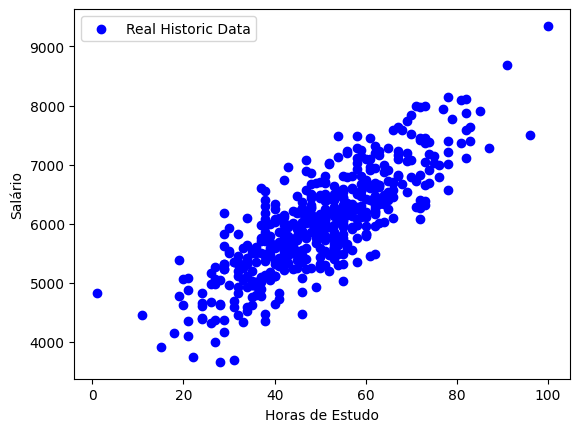

In [27]:
# Gráfico de disperção entre X e Y
plt.scatter(X, y, color = "blue", label = 'Real Historic Data')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [31]:
# Dividir dados em treinamento e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_treino.shape

(400, 1)

In [33]:
X_teste.shape

(100, 1)

In [34]:
y_treino.shape

(400,)

In [35]:
y_teste.shape

(100,)

### Modelagem Preditiva (Machine Learning)

In [36]:
# Cria o modelo de regressão linear simples
model = LinearRegression()

In [37]:
# Treino o modelo
model.fit(X_treino, y_treino)

LinearRegression()

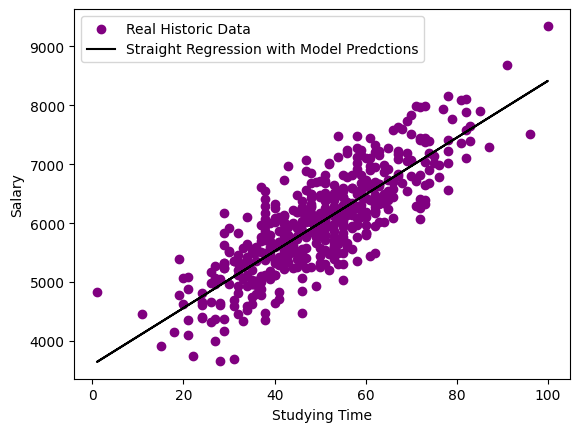

In [43]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usado no treinamento
plt.scatter(X, y, color = "purple", label = "Real Historic Data")
plt.plot(X, model.predict(X), color = "black", label = "Straight Regression with Model Predctions")
plt.xlabel("Studying Time")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [49]:
# Avalia o modelo nos dados de teste:
score = model.score(X_teste, y_teste)
print(f'The score number of our model is {score:.2f}')

The score number of our model is 0.59


In [50]:
# Intercepto - Parâmetro w0 (Intercepto)
model.intercept_

3596.783724372753

In [51]:
# Slope - parâmetro w1 (Calculo da Inclincação da reta)
model.coef_

array([48.18185277])

Algoritmo de Regressão Linear:

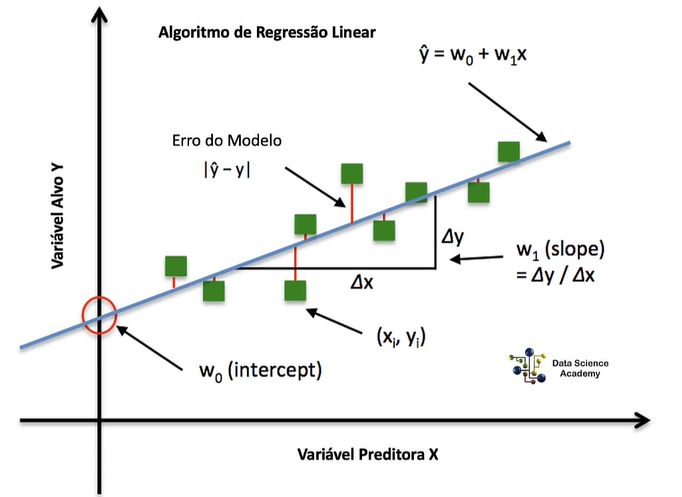

### Deploy do Modelo:

Usaremos o modelo para prever o salário com base nas horas de estudo.

In [58]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz a previsão com o modelo treinado
salario_previsto = model.predict(horas_estudo_novo)

print(f'If you spent {horas_estudo_novo} learning per month, you salary can be {salario_previsto}')

If you spent [[48]] learning per month, you salary can be [5909.5126574]


In [59]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
salario = model.intercept_ + (model.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [61]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz a previsão com o modelo treinado
salario_previsto = model.predict(horas_estudo_novo)

print(f'If you spent {horas_estudo_novo}h learning per month, you salary can be {salario_previsto}')

If you spent [[65]]h learning per month, you salary can be [6728.60415452]
